In [1]:
import pandas as pd

In [2]:
mnist_csv = pd.read_csv( './mnist_train.csv', header=None, skiprows=1).values

In [3]:
mnist_csv.shape

(60000, 785)

In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split( mnist_csv, test_size=0.3, random_state=1 )

In [5]:
from tensorflow.keras import utils
Y_train, X_train = utils.to_categorical( train[:, 0] ), train[:, 1:]
Y_test, X_test = utils.to_categorical(test[:, 0]), test[:, 1:]
print( X_train.shape, Y_train.shape )
print( X_test.shape, Y_test.shape )

(42000, 784) (42000, 10)
(18000, 784) (18000, 10)


In [6]:
X_train = (X_train - 0)/255 #normalize
X_test = (X_test - 0)/255   #normalize
print( Y_train[0] )
print( X_train[0] )

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0

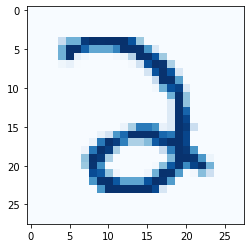

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.imshow( np.reshape(X_train[0], (28, 28) ), cmap=plt.cm.Blues)
plt.show()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
mlp_model = Sequential()
mlp_model.add(Dense(512, activation='relu', input_shape=(784,)))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [13]:
sgd = SGD(lr = 0.005 )
mlp_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [16]:
model_history = mlp_model.fit(X_train, Y_train , epochs=15, batch_size=256,
verbose=1, validation_data=(X_test, Y_test), shuffle=True)
print( "\nCompleted.")

Epoch 1/15
165/165 [==============================] - 2s 13ms/step - loss: 0.2652 - accuracy: 0.9257 - val_loss: 0.2771 - val_accuracy: 0.9217
Epoch 2/15
165/165 [==============================] - 2s 13ms/step - loss: 0.2621 - accuracy: 0.9260 - val_loss: 0.2745 - val_accuracy: 0.9217
Epoch 3/15
165/165 [==============================] - 2s 12ms/step - loss: 0.2589 - accuracy: 0.9270 - val_loss: 0.2717 - val_accuracy: 0.9233
Epoch 4/15
165/165 [==============================] - 2s 12ms/step - loss: 0.2559 - accuracy: 0.9280 - val_loss: 0.2688 - val_accuracy: 0.9235
Epoch 5/15
165/165 [==============================] - 2s 12ms/step - loss: 0.2530 - accuracy: 0.9290 - val_loss: 0.2666 - val_accuracy: 0.9247
Epoch 6/15
165/165 [==============================] - 2s 12ms/step - loss: 0.2502 - accuracy: 0.9290 - val_loss: 0.2642 - val_accuracy: 0.9247
Epoch 7/15
165/165 [==============================] - 2s 12ms/step - loss: 0.2475 - accuracy: 0.9304 - val_loss: 0.2611 - val_accuracy: 0.9256

In [17]:
print( model_history.history.keys() )

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Plot loss curve

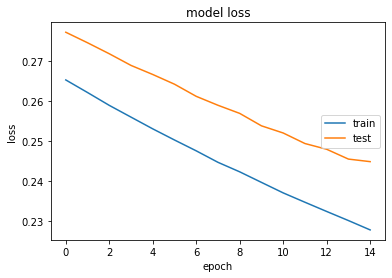

In [18]:
plt.plot( model_history.history['loss'])
plt.plot( model_history.history['val_loss'])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend( ['train', 'test'], loc='right' )
plt.show()

Plot accuracy curve

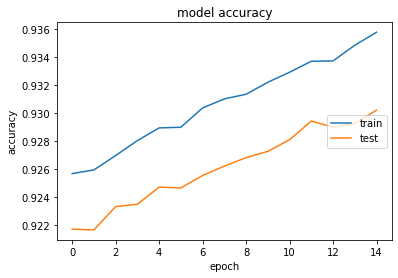

In [20]:
plt.plot( model_history.history['accuracy'])
plt.plot( model_history.history['val_accuracy'])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend( ['train', 'test'], loc='right' )
plt.show()

In [37]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix( model_input , feature, label, class_info ) :
    pred = model_input.predict ( feature )
    cnf_matrix = confusion_matrix( np.argmax(label, axis=1), np.argmax(pred,axis=1))
    plt.figure()
    plt.imshow( cnf_matrix , interpolation='nearest', cmap=plt.cm.Blues )
    tick_marks = np.arange( len(class_info) )
    plt.xticks( tick_marks, class_info, rotation=45)
    plt.yticks( tick_marks, class_info )
    thresh = cnf_matrix.max() / 2.0
    for i, j in itertools.product( range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1]) ) :
        plt.text( j, i, cnf_matrix[i, j], horizontalalignment="center", 
                 color="white" if cnf_matrix[i, j] > thresh else "black" )
    plt.tight_layout()
    plt.ylabel( "True label" )
    plt.xlabel( "Predicted label" )
    plt.show()

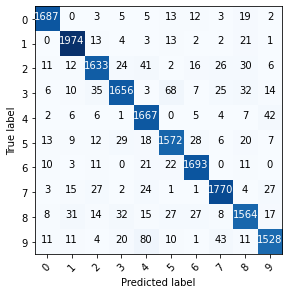

In [38]:
label = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix( mlp_model , X_test , Y_test , class_info=label)